In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


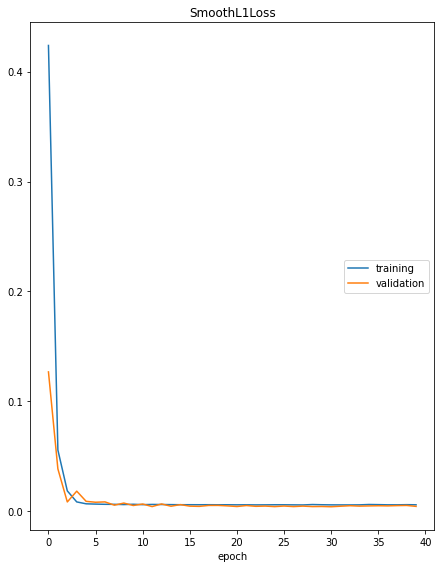

Epoch[40/40]: 100%|██████████| 40/40 [00:03<00:00, 10.31it/s, SmoothL1Loss=0.00591, MAE=0.391, RegLoss=0, MAE_val=0.335, SmoothL1Loss_val=0.00447]


,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
0,0.423766,3.955969,0.0,0.126808,2.132685
1,0.055747,1.309399,0.0,0.038585,1.142140
2,0.018564,0.747153,0.0,0.008491,0.524381
3,0.008531,0.497844,0.0,0.018311,0.877784
4,0.006806,0.433405,0.0,0.009043,0.583439


In [3]:
m = NeuralProphet()
metrics = m.fit(df, freq="D", plot_live_loss=True, validate_each_epoch=0.1)
metrics.head()

In [4]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
future.tail()

,ds,y,t,y_scaled
3265,2017-01-15,NaN,1.397226,NaN
3266,2017-01-16,NaN,1.397646,NaN
3267,2017-01-17,NaN,1.398066,NaN
3268,2017-01-18,NaN,1.398487,NaN
3269,2017-01-19,NaN,1.398907,NaN


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat1']].tail()
# forecast.tail()

,ds,yhat1
3265,2017-01-15,8.301604
3266,2017-01-16,8.614816
3267,2017-01-17,8.517691
3268,2017-01-18,8.353624
3269,2017-01-19,8.156792


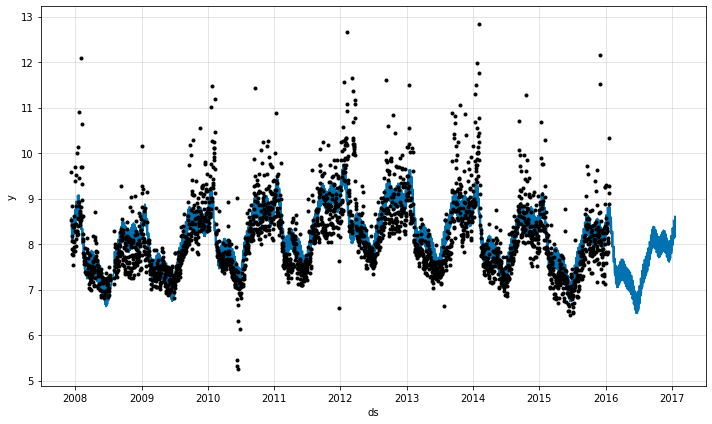

In [6]:
fig1 = m.plot(forecast)

In [7]:
# fig = m.plot_components(forecast, residuals=True)

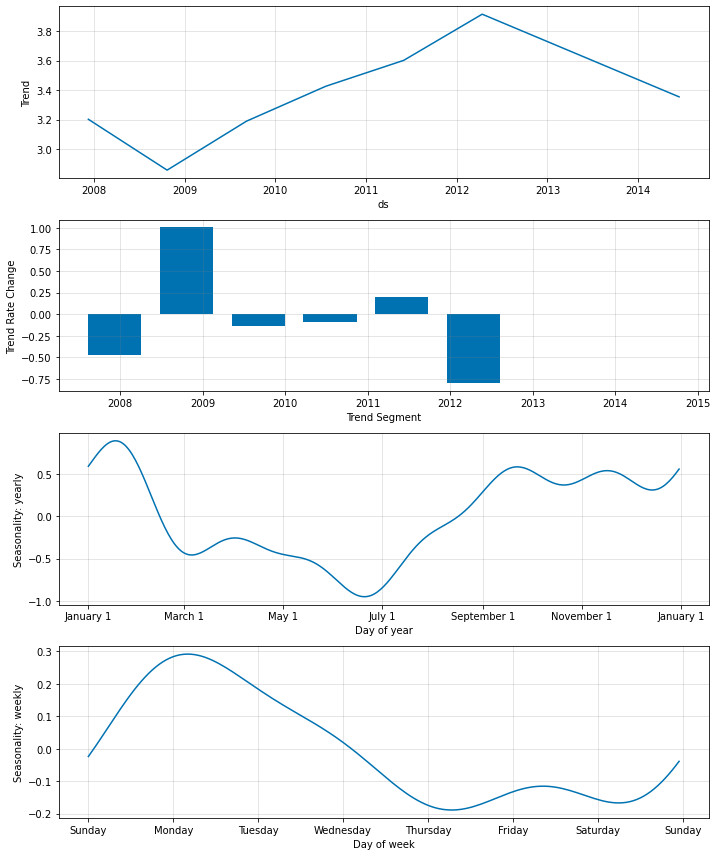

In [8]:
fig2 = m.plot_parameters()

# Adjusting Trend
## Automatic trendpoint selection

In [9]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=1.00,
    changepoints_range=0.90,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 14.01it/s, SmoothL1Loss=0.00606, MAE=0.383, RegLoss=0.00262]


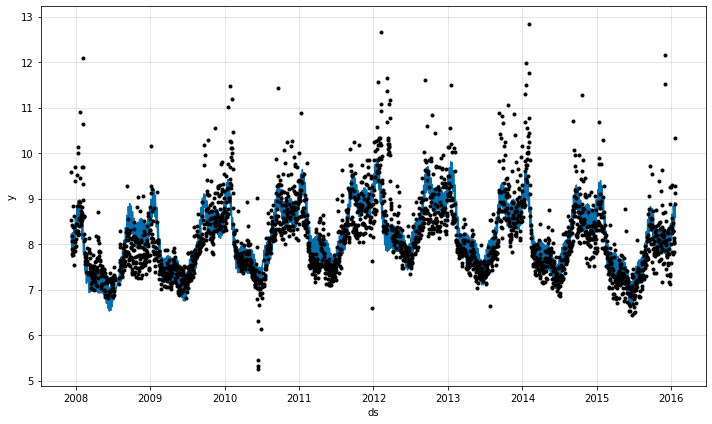

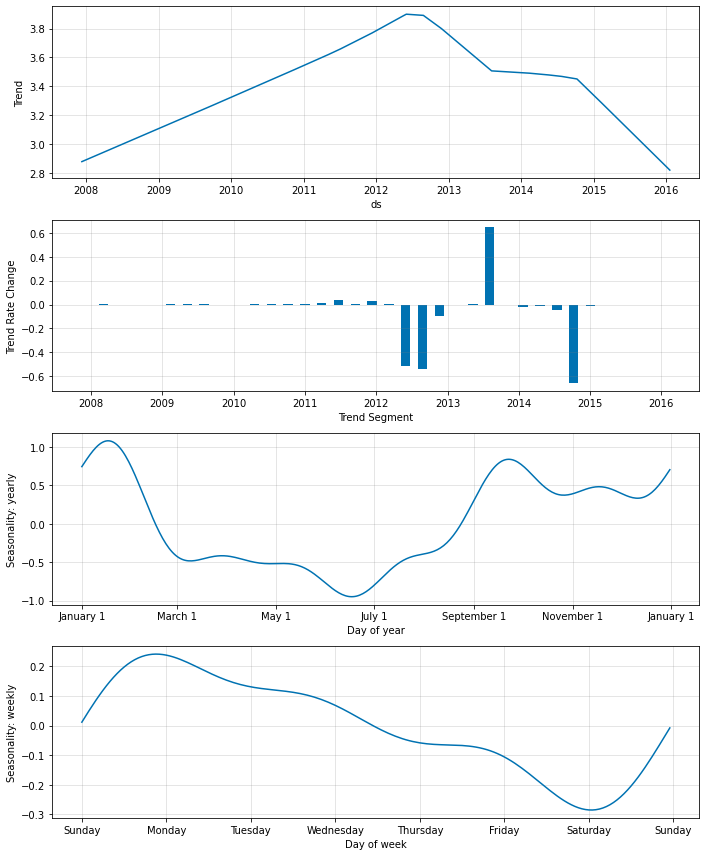

In [10]:
fig1 = m.plot(forecast)
fig2 = m.plot_parameters()

We can adjust the regularization strength to get more or less points with a non-zero rate change.
Note: for too high regularization strengths, the model fitting process becomes unstable.

In [11]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=0.20,
    changepoints_range=0.90,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 14.47it/s, SmoothL1Loss=0.00605, MAE=0.392, RegLoss=0.00241] 


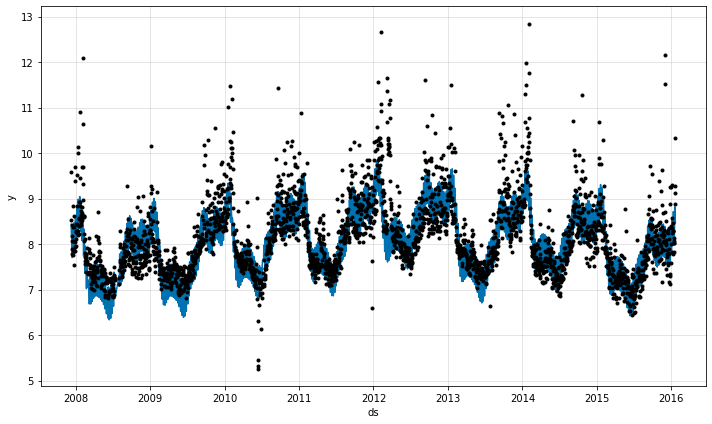

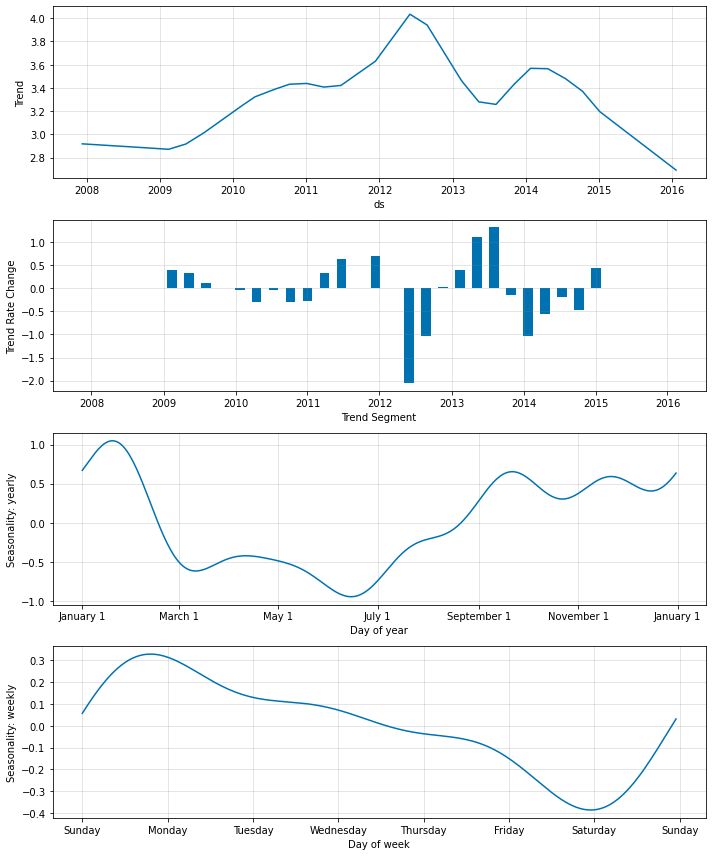

In [12]:
fig1 = m.plot(forecast)
fig2 = m.plot_parameters()

In [13]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=2.00,
    changepoints_range=0.90,   
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 14.11it/s, SmoothL1Loss=0.00645, MAE=0.399, RegLoss=0.00187]


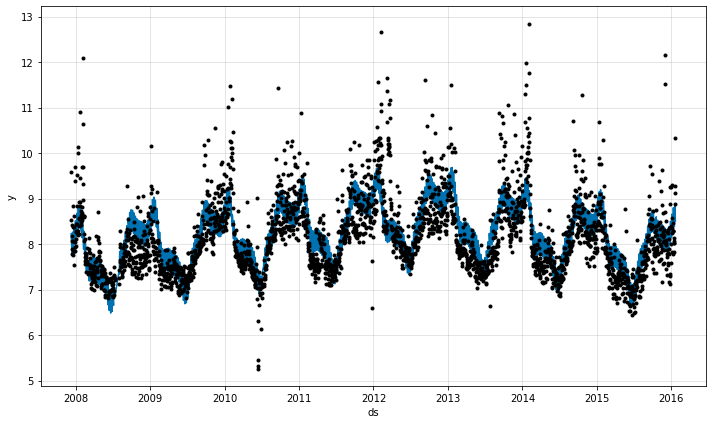

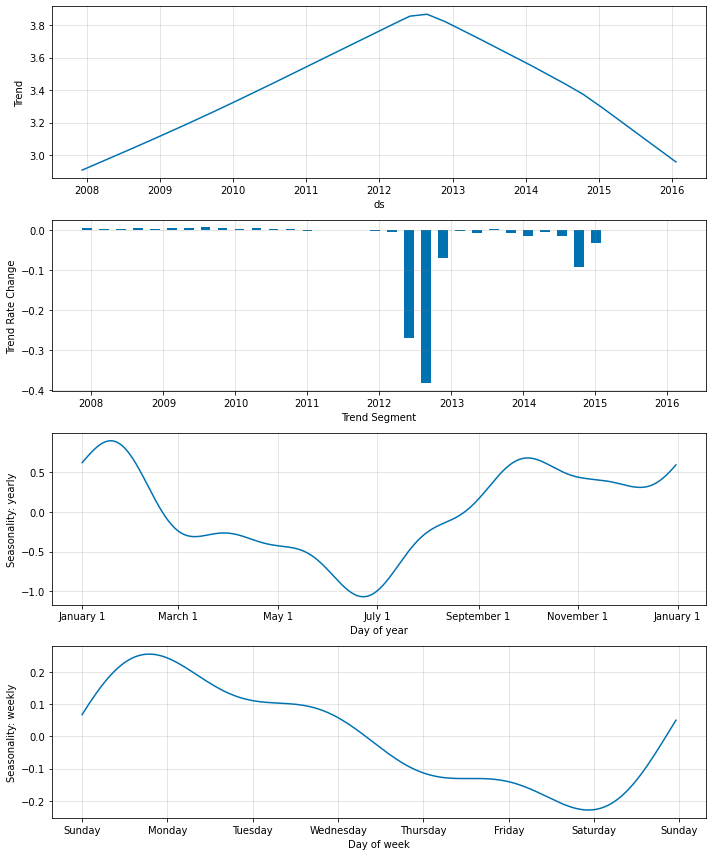

In [14]:
fig1 = m.plot(forecast)
fig2 = m.plot_parameters()

## Manual Trend Changepoints
You can also manually specify the trend changepoints.
Note: A changepoint will always be added at the beginning. You can ignore it.

In [15]:
m = NeuralProphet(
    changepoints=['2012-01-01', '2014-01-01'],
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 15.01it/s, SmoothL1Loss=0.00618, MAE=0.386, RegLoss=0]


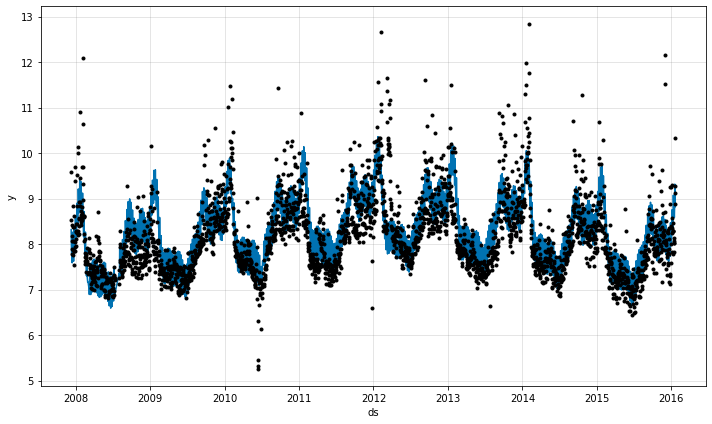

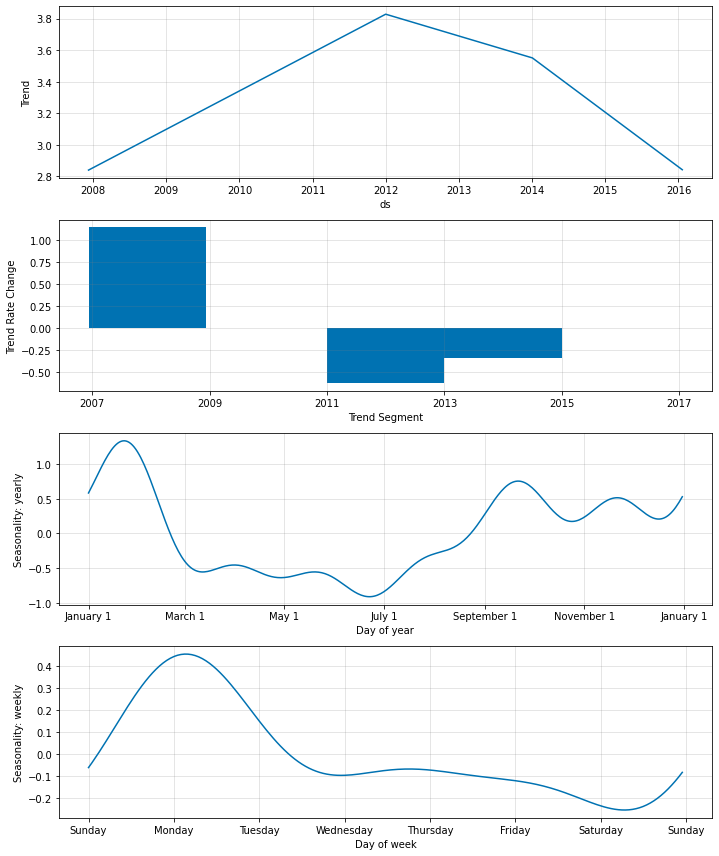

In [16]:
fig1 = m.plot(forecast)
fig2 = m.plot_parameters()